# Plotting Polarisation and Movement Vectors

The `temul.polarisation` module allows one to visualise the
polarisation/movement of atoms in an atomic resolution image. In this tutorial,
we will use a dummy dataset to show the different ways the `plot_polarisation_vectors`
function can display data. In future, tutorials on published experimental data
will also be available.

## Prepare and Plot the dummy dataset


In [7]:
# choose your matplotlib backend. qt will plot in a separate window.
%matplotlib nbagg
import matplotlib
matplotlib.pyplot.style.use("grayscale")

<IPython.core.display.Javascript object>


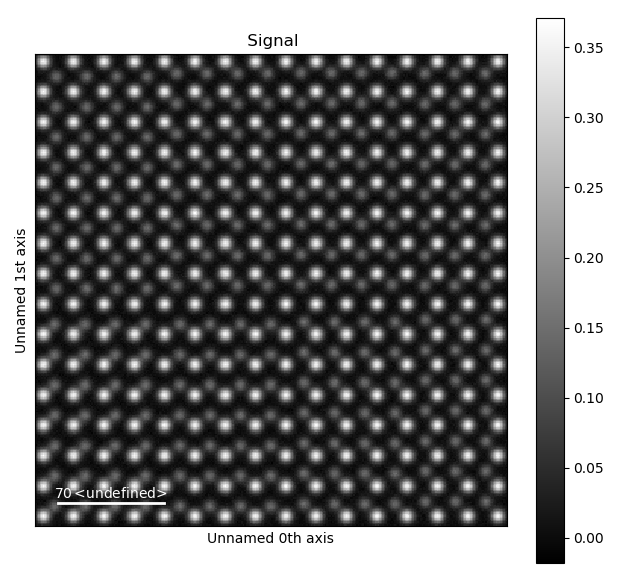

In [2]:
from temul.polarisation import plot_polarisation_vectors
from temul.dummy_data import get_polarisation_dummy_dataset
atom_lattice = get_polarisation_dummy_dataset(image_noise=True)
sublatticeA = atom_lattice.sublattice_list[0]
sublatticeB = atom_lattice.sublattice_list[1]
image = sublatticeA.signal
image.plot()

<IPython.core.display.Javascript object>


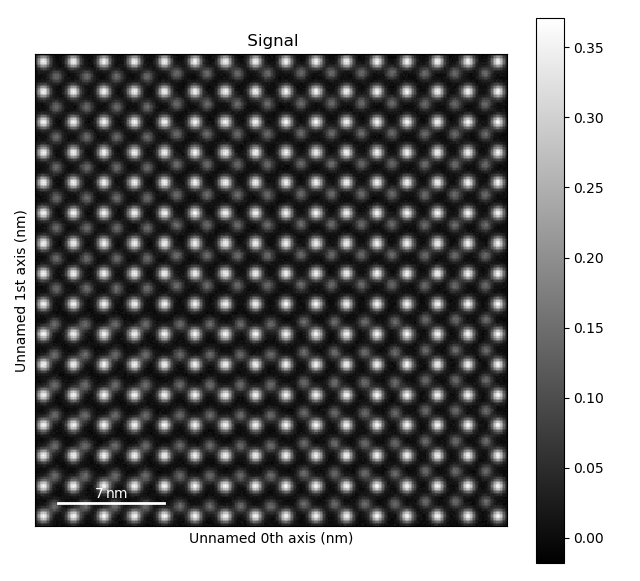

In [3]:
# It is best when the image is calibrated.
# Your image may already be calibrated, but if not, use Hyperspy's `axes_manager` for calibration.

sampling = 0.1  # example of 0.1 nm/pix
units = 'nm'
image.axes_manager[-1].scale = sampling
image.axes_manager[-2].scale = sampling
image.axes_manager[-1].units = units
image.axes_manager[-2].units = units
image.plot()

# Zoom in on the image to see how the atoms look in the different regions.

## Find the Vector Coordinates using Atomap

Using the Atomap (https://atomap.org/) package, we can easily get the polarisation vectors for regular structures.


In [4]:
sublatticeA.construct_zone_axes()
za0, za1 = sublatticeA.zones_axis_average_distances[0:2]

s_p = sublatticeA.get_polarization_from_second_sublattice(
    za0, za1, sublatticeB, color='blue')

vector_list = s_p.metadata.vector_list
x, y = [i[0] for i in vector_list], [i[1] for i in vector_list]
u, v = [i[2] for i in vector_list], [i[3] for i in vector_list]

Now we can display all of the variations that `plot_polarisation_vectors`
gives us! You can specify sampling (scale) and units, or use a calibrated image
so that they are automatically set.

<IPython.core.display.Javascript object>


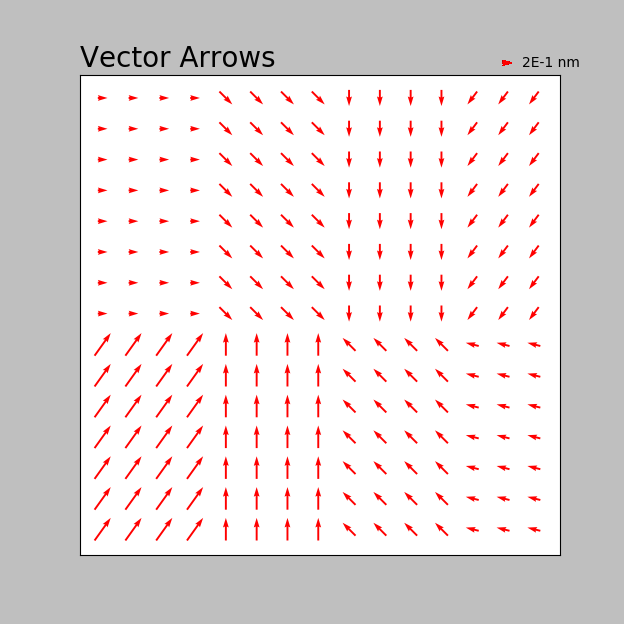

In [9]:
# Vector magnitude plot with red arrows:

plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=False, save=None,
                          plot_style='vector', color='r',
                          overlay=False, title='Vector Arrows',
                          monitor_dpi=50)


<IPython.core.display.Javascript object>


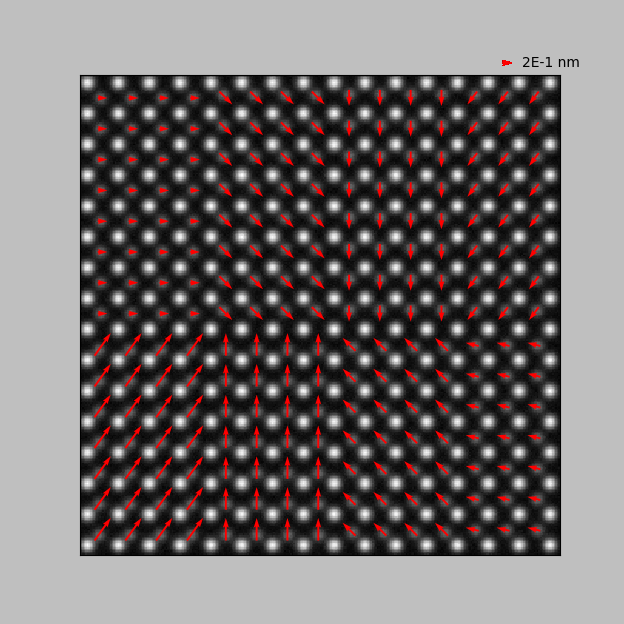

In [8]:
# Vector magnitude plot with red arrows overlaid on the image, no title:

plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=False, save=None,
                          plot_style='vector', color='r',
                          overlay=True, monitor_dpi=50)

<IPython.core.display.Javascript object>


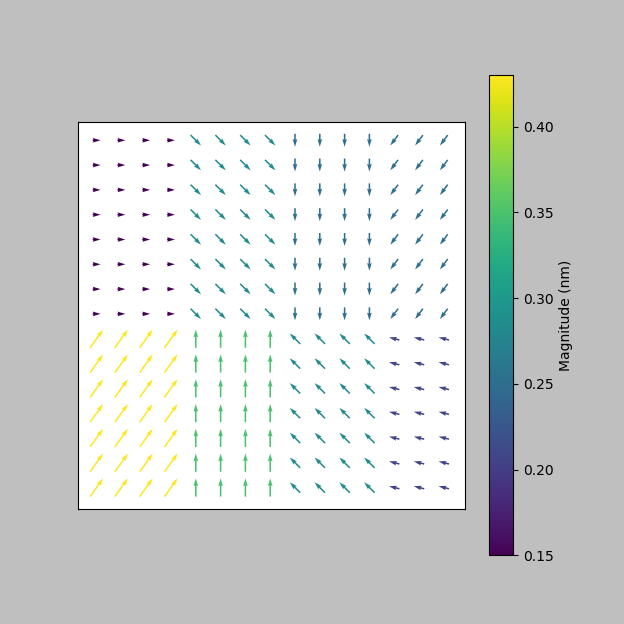

In [10]:
#Vector magnitude plot with colormap viridis:

plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=False, save=None,
                          plot_style='colormap', monitor_dpi=50,
                          overlay=False, cmap='viridis')


<IPython.core.display.Javascript object>


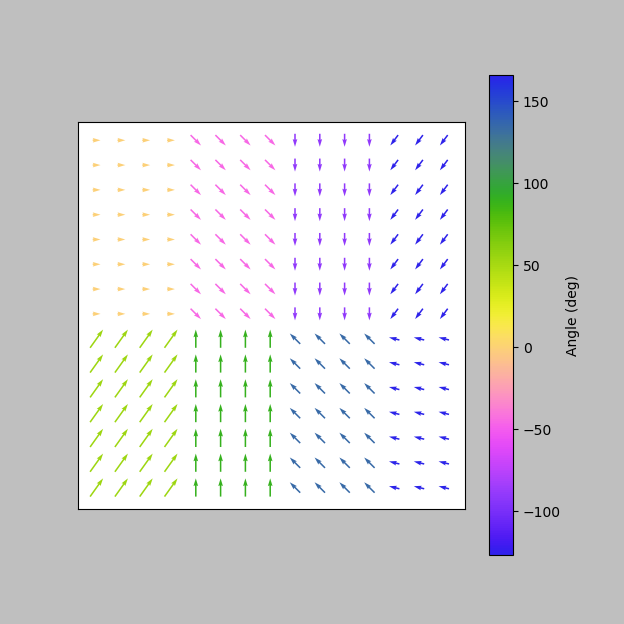

In [11]:
#Vector angle plot with colormap viridis (:python:`vector_rep='angle'`):

plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=False, save=None,
                          plot_style='colormap', monitor_dpi=50,
                          overlay=False, cmap='cet_colorwheel',
                          vector_rep="angle", degrees=True)


<IPython.core.display.Javascript object>


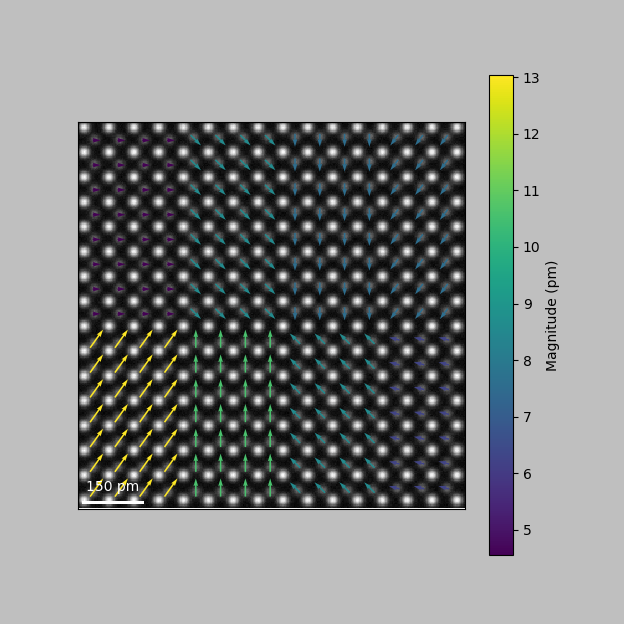

In [12]:
# Colormap arrows with sampling specified in the parameters and with scalebar:

plot_polarisation_vectors(x, y, u, v, image=sublatticeA.image,
                          sampling=3.0321, units='pm', monitor_dpi=50,
                          unit_vector=False, plot_style='colormap',
                          overlay=True, save=None, cmap='viridis',
                          scalebar=True)


<IPython.core.display.Javascript object>


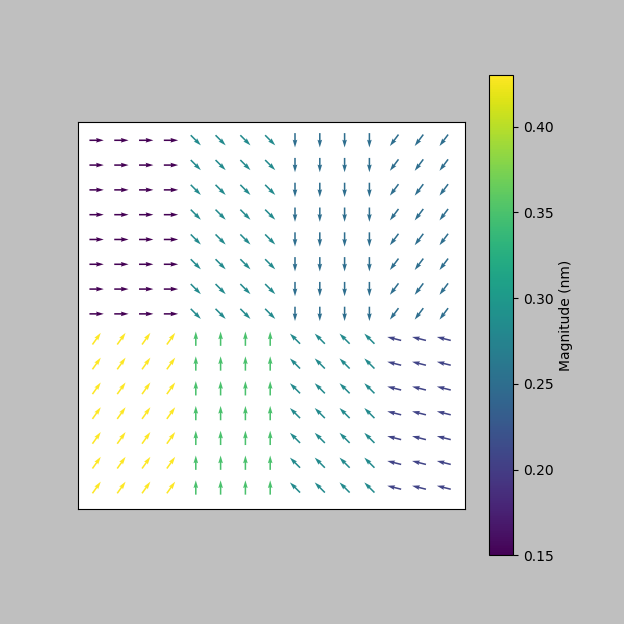

In [13]:
#Vector plot with colormap viridis and unit vectors:

plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=True, save=None, monitor_dpi=50,
                          plot_style='colormap', color='r',
                          overlay=False, cmap='viridis')


<IPython.core.display.Javascript object>


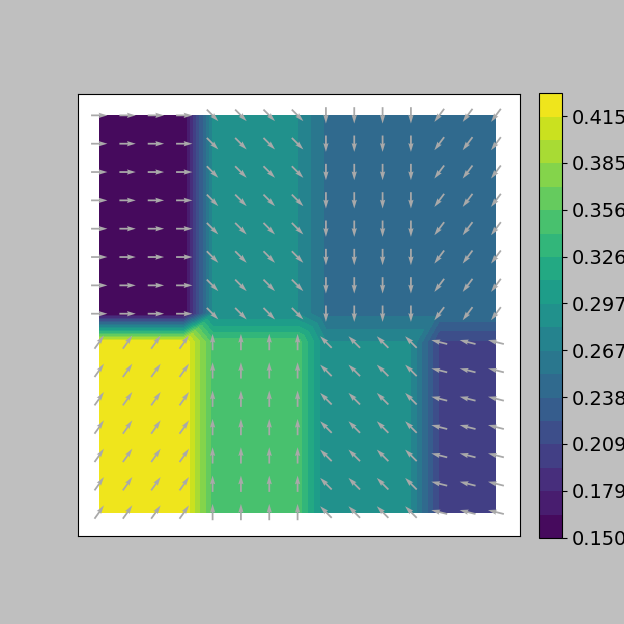

In [15]:
#Change the vectors to unit vectors on a Matplotlib tricontourf map:

plot_polarisation_vectors(x, y, u, v, image=image, unit_vector=True,
                          plot_style='contour', overlay=False,
                          pivot='middle', save=None, monitor_dpi=50,
                          color='darkgray', cmap='viridis')


<IPython.core.display.Javascript object>


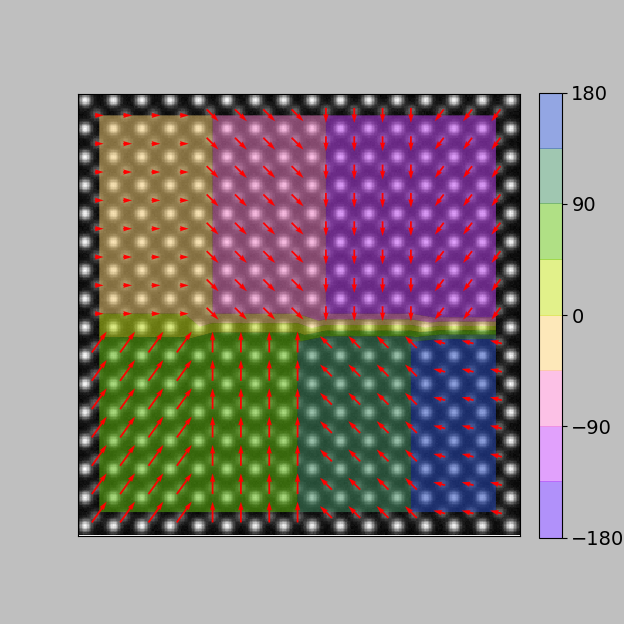

In [14]:
# Plot a partly transparent angle tricontourf map with specified colorbar ticks and vector arrows:

plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=False, plot_style='contour',
                          overlay=True, pivot='middle', save=None,
                          color='red', cmap='cet_colorwheel',
                          monitor_dpi=50, remove_vectors=False,
                          vector_rep="angle", alpha=0.5, levels=9,
                          antialiased=True, degrees=True,
                          ticks=[180, 90, 0, -90, -180])


<IPython.core.display.Javascript object>


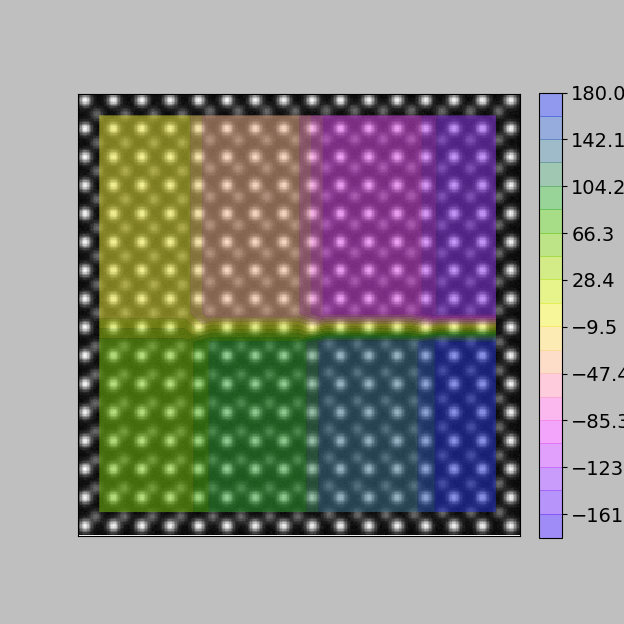

In [16]:
# Plot a partly transparent angle tricontourf map with no vector arrows:

plot_polarisation_vectors(x, y, u, v, image=image, remove_vectors=True,
                          unit_vector=True, plot_style='contour',
                          overlay=True, pivot='middle', save=None,
                          cmap='cet_colorwheel', alpha=0.5,
                          monitor_dpi=50, vector_rep="angle",
                          antialiased=True, degrees=True)


<IPython.core.display.Javascript object>


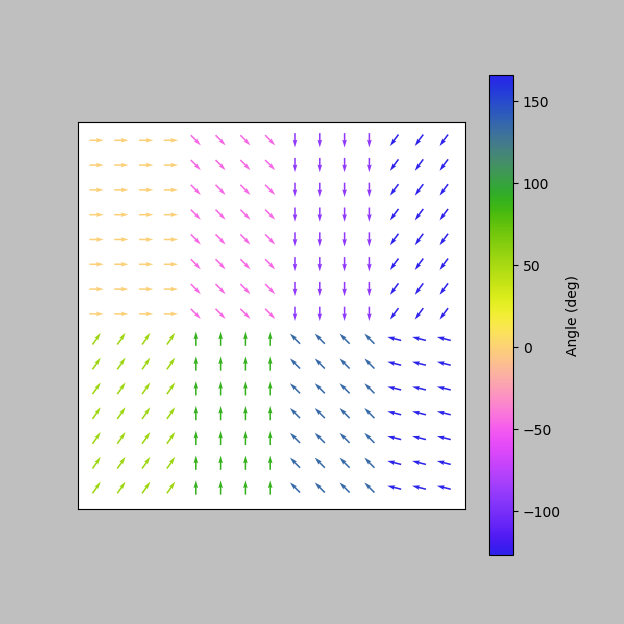

In [17]:
# "colorwheel" plot of the vectors, useful for visualising vortexes:

import colorcet as cc

plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=True, plot_style="colorwheel",
                          vector_rep="angle",
                          overlay=False, cmap=cc.cm.colorwheel,
                          degrees=True, save=None, monitor_dpi=50)


<IPython.core.display.Javascript object>


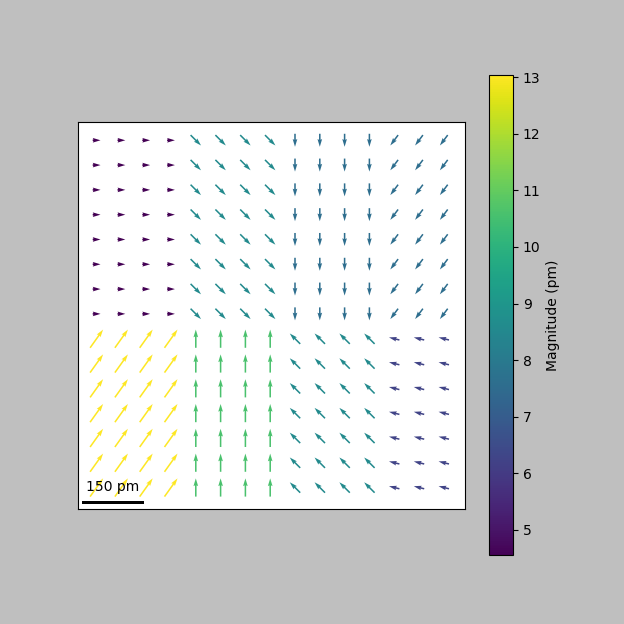

In [18]:
# Plot with a custom scalebar. In this example, we need it to be dark, see matplotlib-scalebar for more custom features.

scbar_dict = {"dx": 3.0321, "units": "pm", "location": "lower left",
              "box_alpha":0.0, "color": "black", "scale_loc": "top"}

plot_polarisation_vectors(x, y, u, v, image=sublatticeA.image,
                          sampling=3.0321, units='pm', monitor_dpi=50,
                          unit_vector=False, plot_style='colormap',
                          overlay=False, save=None, cmap='viridis',
                          scalebar=scbar_dict)


<IPython.core.display.Javascript object>


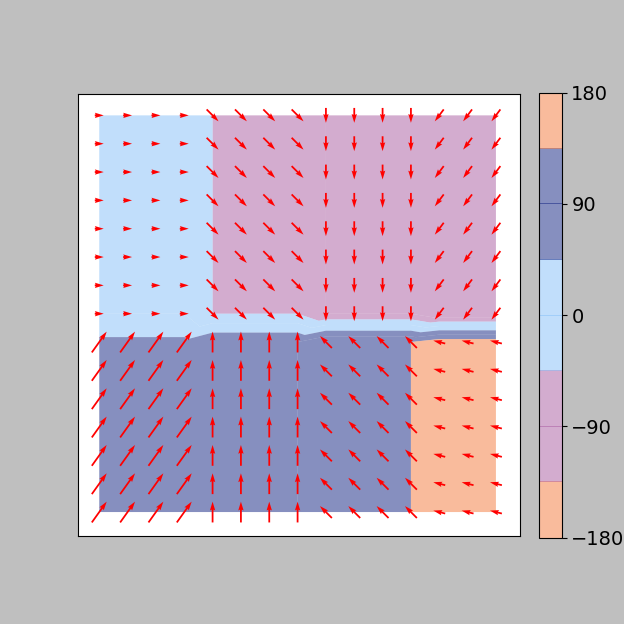

In [19]:
# Plot a tricontourf for quadrant visualisation using a custom matplotlib cmap:

import temul.signal_plotting as tmlplot
from matplotlib.colors import from_levels_and_colors
zest = tmlplot.hex_to_rgb(tmlplot.color_palettes('zesty'))
zest.append(zest[0])  # make the -180 and 180 degree colour the same
expanded_zest = tmlplot.expand_palette(zest, [1,2,2,2,1])

custom_cmap, _ = from_levels_and_colors(
    levels=range(9), colors=tmlplot.rgb_to_dec(expanded_zest))

plot_polarisation_vectors(x, y, u, v, image=image,
                          unit_vector=False, plot_style='contour',
                          overlay=False, pivot='middle', save=None,
                          cmap=custom_cmap, levels=9, monitor_dpi=50,
                          vector_rep="angle", alpha=0.5, color='r',
                          antialiased=True, degrees=True,
                          ticks=[180, 90, 0, -90, -180])
